# Import Packages

In [15]:
# Import the NetworkX library for working with graphs and the Matplotlib library for plotting
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read txt file and define metrics

In [49]:
# Open the file containing the edge list of the graph
with open('/Users/willberritt/Downloads/facebook_combined.txt', 'r') as f:
    # Read the edge list from the file and create a graph object
    # delimiter=' ' specifies that edges are separated by a space
    # create_using=nx.Graph() specifies that we are creating an undirected graph
    # nodetype=int converts node labels to integers
    data = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph(), nodetype=int)

# Calculate the diameter of the graph (the longest shortest path between any two nodes)
diameter = nx.diameter(data)
# Get the number of nodes in the graph
num_nodes = data.number_of_nodes()
# Get the number of edges in the graph
num_edges = data.number_of_edges()
# Calculate the density of the graph (the ratio of the number of edges to the number of possible edges)
density = nx.density(data)

# Return metrics

In [3]:
# Print the calculated metrics
print(f"diameter: {diameter}")
print(f"nodes: {num_nodes}")
print(f"edges: {num_edges}")
print(f"density: {density}")

diameter: 8
nodes: 4039
edges: 88234
density: 0.010819963503439287


# Create visualization

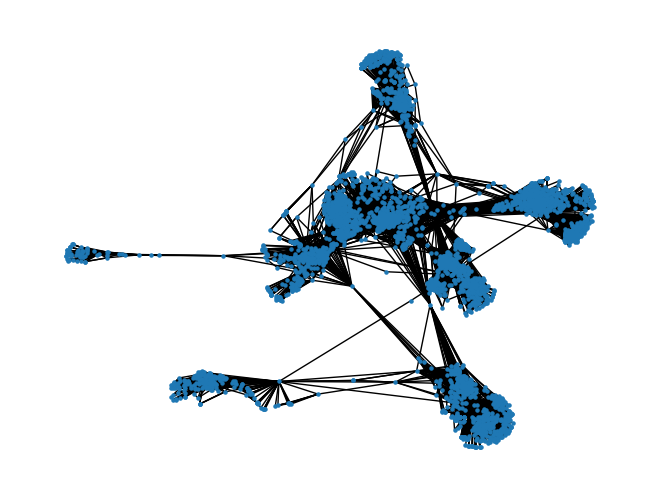

In [4]:
# Create a new figure for plotting the graph
plt.figure()
# Draw the graph with nodes of size 5
nx.draw(data, node_size=5)
# Display the plot
plt.show()

# Alternative visualization tools

In [5]:
pos1 = nx.circular_layout(data)
pos2 = nx.spring_layout(data)
pos3 = nx.spectral_layout(data)

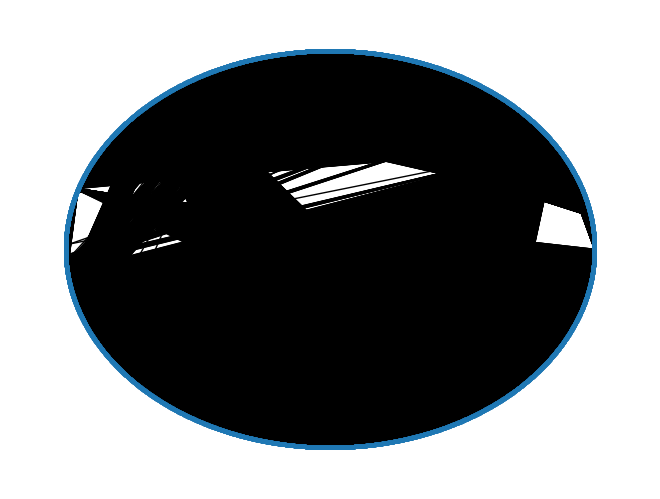

In [6]:
nx.draw(data, pos1, node_size=5)
plt.show()

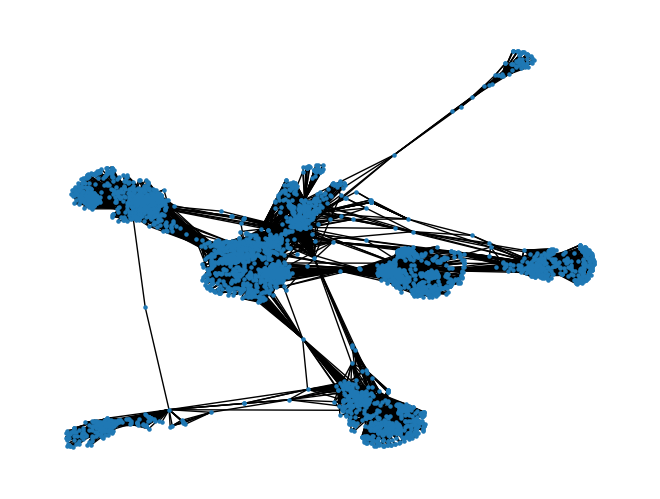

In [7]:
nx.draw(data, pos2, node_size=5)

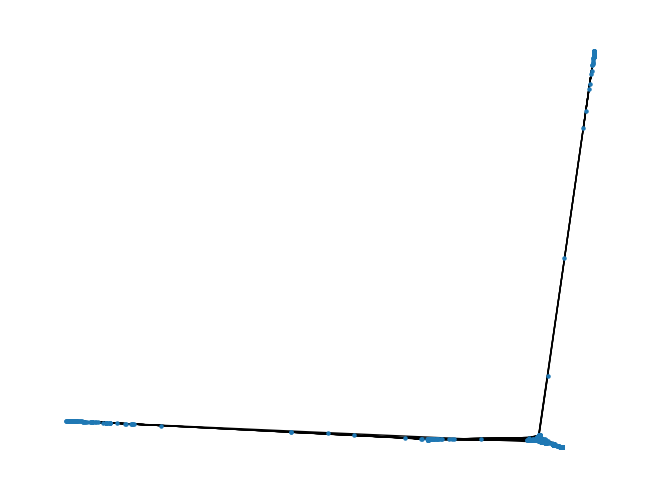

In [8]:
nx.draw(data, pos3, node_size=5)

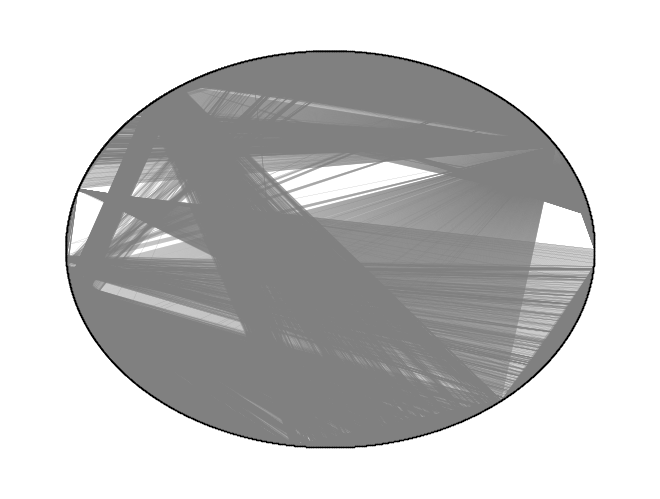

In [9]:
options = {
    "node_color": "black",
    "node_size": 1,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw_circular(data, **options)

# Used Networkx library example and fit the graphing functions to our data

In [10]:
import math

def progressive_widening_search(G, source, value, condition, initial_width=1):
    """Progressive widening beam search to find a node.

    The progressive widening beam search involves a repeated beam
    search, starting with a small beam width then extending to
    progressively larger beam widths if the target node is not
    found. This implementation simply returns the first node found that
    matches the termination condition.

    `G` is a NetworkX graph.

    `source` is a node in the graph. The search for the node of interest
    begins here and extends only to those nodes in the (weakly)
    connected component of this node.

    `value` is a function that returns a real number indicating how good
    a potential neighbor node is when deciding which neighbor nodes to
    enqueue in the breadth-first search. Only the best nodes within the
    current beam width will be enqueued at each step.

    `condition` is the termination condition for the search. This is a
    function that takes a node as input and return a Boolean indicating
    whether the node is the target. If no node matches the termination
    condition, this function raises :exc:`NodeNotFound`.

    `initial_width` is the starting beam width for the beam search (the
    default is one). If no node matching the `condition` is found with
    this beam width, the beam search is restarted from the `source` node
    with a beam width that is twice as large (so the beam width
    increases exponentially). The search terminates after the beam width
    exceeds the number of nodes in the graph.

    """
    # Check for the special case in which the source node satisfies the
    # termination condition.
    if condition(source):
        return source
    # The largest possible value of `i` in this range yields a width at
    # least the number of nodes in the graph, so the final invocation of
    # `bfs_beam_edges` is equivalent to a plain old breadth-first
    # search. Therefore, all nodes will eventually be visited.
    log_m = math.ceil(math.log2(len(G)))
    for i in range(log_m):
        width = initial_width * pow(2, i)
        # Since we are always starting from the same source node, this
        # search may visit the same nodes many times (depending on the
        # implementation of the `value` function).
        for u, v in nx.bfs_beam_edges(G, source, value, width):
            if condition(v):
                return v
    # At this point, since all nodes have been visited, we know that
    # none of the nodes satisfied the termination condition.
    raise nx.NodeNotFound("no node satisfied the termination condition")

In [ ]:
"""Eigenvector centrality:
Centrality as a whole is used to figure out the most important nodes when analyzing a network. 
Eigenvector centrality measures the influence a node has within a network, 
rather than strictly measuring how many edges it shares with other nodes. 
Looking at the centrality graph I produced with some code from network x’s own library of examples, 
the algorithm uses beam search to find the single highest centrality 
score within the network of nodes (eigenvector centrality in this case) and recolors and sized up that single node to stand out. 
The code also cuts down on computing time because it calculates average eigenvector centrality beforehand and only looks for nodes above the threshold (deemed as high centrality in the code).
"""
centrality = nx.eigenvector_centrality(data)
average_centrality = sum(centrality.values()) / len(data)

def has_high_centrality(v):
    return centrality[v] >= average_centrality


source = 0
value = centrality.get
condition = has_high_centrality

found_node = progressive_widening_search(data, source, value, condition)
c = centrality[found_node]
print(f"found node {found_node} with centrality {c}")


# Draw graph
pos = nx.spring_layout(data)
options = {
    "node_color": "black",
    "node_size": 20,
    "edge_color": "grey",
    "linewidths": 1,
    "width": 0.1,
}
nx.draw(data, pos, **options)
# Draw node with high centrality as large and red
nx.draw_networkx_nodes(data, pos, nodelist=[found_node], node_size=100, node_color="r")
plt.show()

found node 136 with centrality 0.00389437464847358


In [21]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
def sorted_dict(d):
    ms = sorted(d.items() , reverse=True, key=lambda x: x[1])
    return ms
with open("/Users/willberritt/Downloads/facebook_combinedChafiaa.txt", 'r') as f:
    data = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph(), nodetype=int)

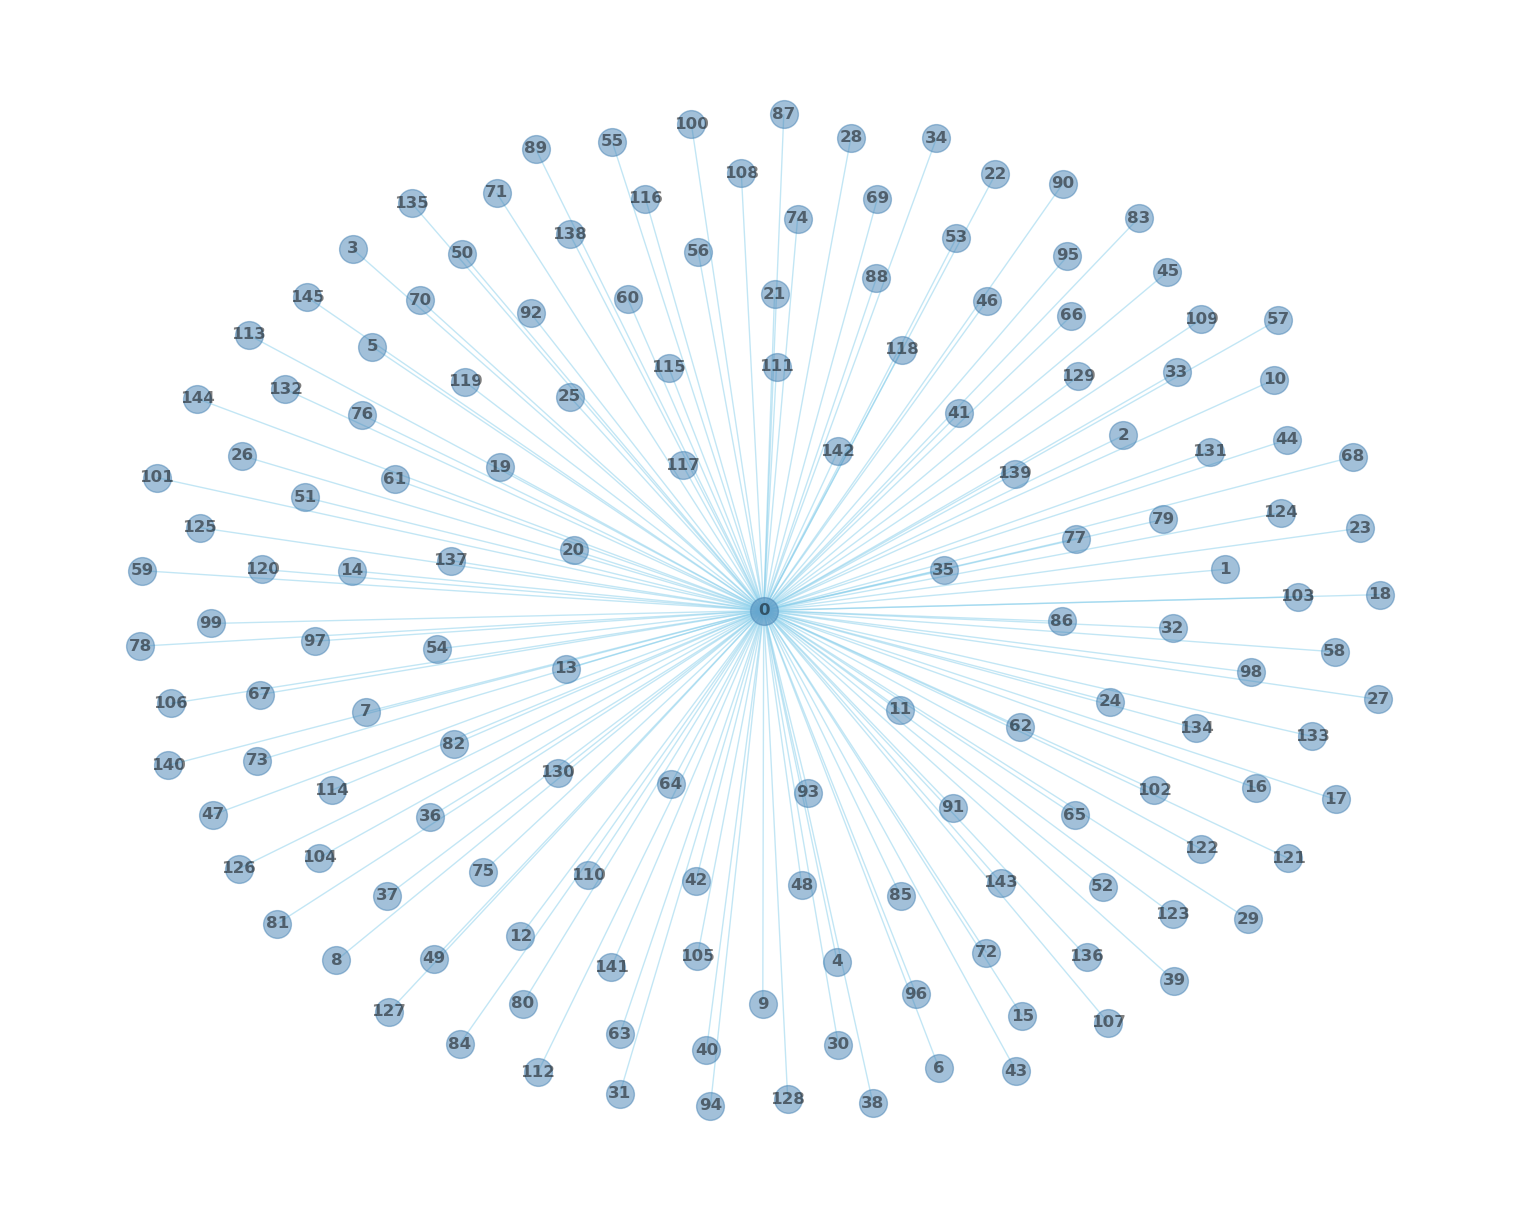

In [22]:
nx.draw(data, with_labels=True, node_color="steelblue", node_size=400, font_weight='bold', 
        edge_color="skyblue", alpha=0.5)

# Metrics: Eccentricity, Radius, and Diameter

Text(0, 0.5, 'Frequency')

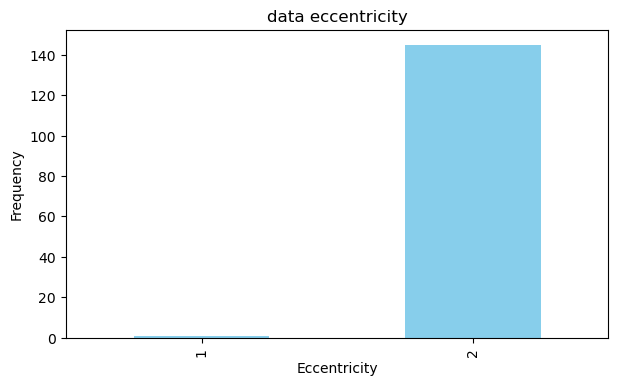

In [23]:
data_ecc = pd.DataFrame((nx.eccentricity(data).values()))[0].value_counts().sort_index()

plot = data_ecc.plot(kind='bar',
                        color = "skyblue",
                        figsize=(7,4),
                        title="data eccentricity")
plot.set_xlabel("Eccentricity")
plot.set_ylabel("Frequency")

In [24]:
nx.radius(data)

1

In [25]:
nx.diameter(data)

2

In [26]:
print(data)
Avr_degree=(150/151)*2
Avr_degree

Graph with 146 nodes and 145 edges


1.9867549668874172

In [27]:
# Degree centrality
d = nx.degree(data)

In [28]:
min(dict(d).values())

1

Text(0.5, 1.0, 'Distribution of Degrees in fb')

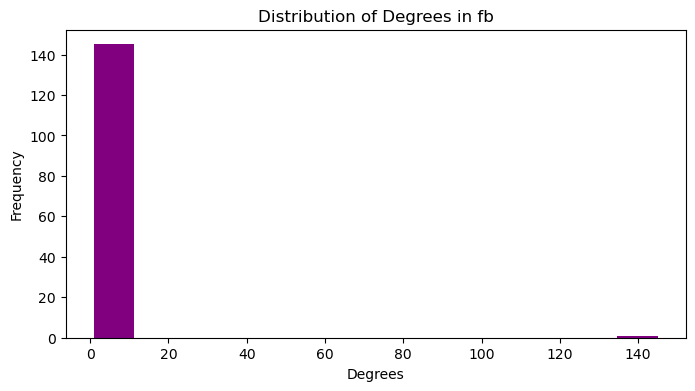

In [29]:
plt.figure(figsize=(8,4))
plt.hist(dict(d).values(), 14, color = "purple")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in fb')

#Graph heavly scwed to the left: 

In [30]:
# Find the top ten
ds = sorted_dict(dict(d))
ds[0:10]

[(0, 145),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [31]:
ds[-1]

(145, 1)

In [32]:
#Closeness Centrality
d_cc = nx.closeness_centrality(data)

In [33]:
# Find the top ten
d_cc_s = sorted_dict(d_cc)
d_cc_s[1:20]

[(1, 0.5017301038062284),
 (2, 0.5017301038062284),
 (3, 0.5017301038062284),
 (4, 0.5017301038062284),
 (5, 0.5017301038062284),
 (6, 0.5017301038062284),
 (7, 0.5017301038062284),
 (8, 0.5017301038062284),
 (9, 0.5017301038062284),
 (10, 0.5017301038062284),
 (11, 0.5017301038062284),
 (12, 0.5017301038062284),
 (13, 0.5017301038062284),
 (14, 0.5017301038062284),
 (15, 0.5017301038062284),
 (16, 0.5017301038062284),
 (17, 0.5017301038062284),
 (18, 0.5017301038062284),
 (19, 0.5017301038062284)]

In [34]:
d_cc_s[-1]

(145, 0.5017301038062284)

Text(0.5, 1.0, 'Distribution of Closeness Metric in fb Network')

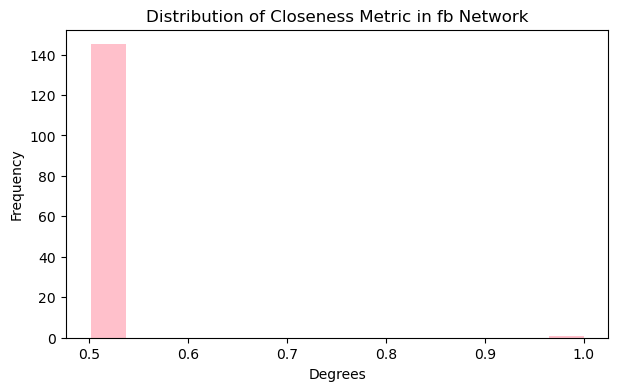

In [35]:
plt.figure(figsize=(7,4))
plt.hist(dict(d_cc).values(), 14, color = "pink")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness Metric in fb Network')

In [36]:
# Betweenness Centrality
d_bc = nx.betweenness_centrality(data)

In [37]:
d_bc_s = sorted_dict(d_bc)
d_bc_s[1:20]

[(1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0)]

In [38]:
d_bc_s[-1]

(145, 0.0)

In [39]:
# Eigenvector Centrality
d_ec = nx.eigenvector_centrality(data)

In [40]:
# Find the top ten
d_ec_s = sorted_dict(d_ec)
d_ec_s[1:20]

[(1, 0.058721656119491095),
 (2, 0.058721656119491095),
 (3, 0.058721656119491095),
 (4, 0.058721656119491095),
 (5, 0.058721656119491095),
 (6, 0.058721656119491095),
 (7, 0.058721656119491095),
 (8, 0.058721656119491095),
 (9, 0.058721656119491095),
 (10, 0.058721656119491095),
 (11, 0.058721656119491095),
 (12, 0.058721656119491095),
 (13, 0.058721656119491095),
 (14, 0.058721656119491095),
 (15, 0.058721656119491095),
 (16, 0.058721656119491095),
 (17, 0.058721656119491095),
 (18, 0.058721656119491095),
 (19, 0.058721656119491095)]

In [41]:
d_ec_s[-1]

(145, 0.058721656119491095)

In [42]:
# Grouping
names1 = [x[0] for x in ds[:20]]
names2 = [x[0] for x in d_cc_s[:20]]
names3 = [x[0] for x in d_bc_s[:20]]
names = list(set(names1) | set(names2) | set(names3))
data = [[name,d[name],d_cc[name],d_bc[name]] for name in names]
pd.DataFrame.from_records(data, columns=['fb', 'Degree', 'Closeness', 'Betweenness'])

,fb,Degree,Closeness,Betweenness
0,0,145,1.00000,1.0
1,1,1,0.50173,0.0
2,2,1,0.50173,0.0
3,3,1,0.50173,0.0
4,4,1,0.50173,0.0
5,5,1,0.50173,0.0
6,6,1,0.50173,0.0
7,7,1,0.50173,0.0
8,8,1,0.50173,0.0
9,9,1,0.50173,0.0


In [43]:
# Identify 'Gray Cardinals'

names4 = [x[0] for x in d_ec_s[:20]]
names = list(set(names4) - (set(names1) | set(names2) | set(names3)))
data = [[name,d[name],d_cc[name],d_bc[name],d_ec[name]] for name in names]
pd.DataFrame.from_records(data, columns=['fb', 'Degree', 'Closeness', 'Betweenness', 'Eigenvector'])

,fb,Degree,Closeness,Betweenness,Eigenvector


# There are no 'Gray Cardinal'  in the top 10 & top 20 eigenvector centrality list .